In [6]:
print("Changing local")
import locale
print( locale.getlocale() )
locale.setlocale(locale.LC_ALL,"C")
print( locale.getlocale() )

Changing local
('fr_FR', 'UTF-8')
(None, None)


In [7]:

import pyAgrum as gum
import pyAgrum.lib.notebook as gnb



# Using o3prm syntax for creating BayesNet

In [8]:
bn=gum.loadBN("./Asia.o3prm",verbose=False)
gnb.showBN(bn,size="3")

In [9]:
bn=gum.loadBN("./aSys.o3prm")
gnb.showBN(bn,size="3")

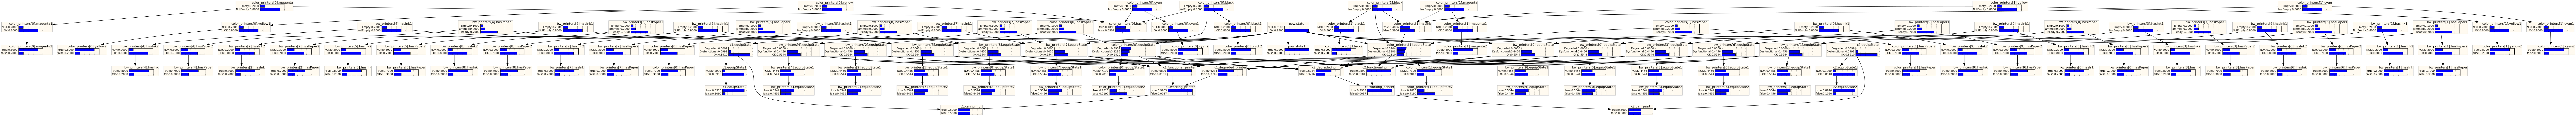

In [10]:
classpath="./ComplexPrinters"
filename=classpath+"/fr/lip6/printers/system.o3prm"
system="Work"
bn=gum.loadBN(filename,system=system,classpath=classpath)
#gnb.showBN(bn,size='10',format="svg")
gnb.showInference(bn,size="150",format='png')


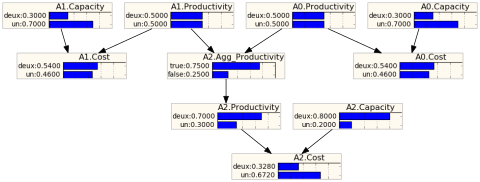

In [11]:
locale.setlocale(locale.LC_ALL,"C")
bn=gum.loadBN("./aSys.o3prm")
gnb.showBN(bn,size='5')
gnb.showInference(bn,size='5')


# Exploring Probabilistic Relational Model

In [12]:
classpath="./ComplexPrinters"
filename=classpath+"/fr/lip6/printers/system.o3prm"
system="Work"
explor=gum.PRMexplorer(filename,classpath)

In [13]:
for cl in explor.classes():
    print("Class : "+cl)
    for attr in explor.attributes(cl):
        print("  - "+attr)
    print()

Class : fr.lip6.printers.base.PowerSupply
  - state

Class : fr.lip6.printers.printers.ColorPrinter
  - magenta
  - equipState
  - hasInk
  - yellow
  - hasPaper
  - cyan
  - black

Class : fr.lip6.printers.printers.BWPrinter
  - hasInk
  - equipState
  - hasPaper

Class : fr.lip6.printers.computer.Computer
  - can_print
  - working_printer
  - equipState

Class : fr.lip6.printers.base.Room



In [14]:
for attr in explor.attributes('fr.lip6.printers.computer.Computer',allAttributes=True):
    print(attr)

(boolean)equipState
(boolean)can_print
(boolean)working_printer
(fr.lip6.printers.base.t_degraded)equipState
(fr.lip6.printers.base.t_state)equipState


In [15]:
from pyAgrum.lib.pretty_print import pretty_cpt

print(pretty_cpt(explor.cpf('fr.lip6.printers.computer.Computer','equipState')))


                               |----------------------|
-------------------------------|fr.lip6.printers.base.|
 fr.lip6.printers.base.t_state |   OK   Dysfun Degrad |
-------------------------------|----------------------|
              OK               | 0.9000 0.0900 0.0100 |
              NOK              | 0.0000 1.0000 0.0000 |
-------------------------------|----------------------|
